In [3]:
%load_ext autoreload
import os
import sys
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sys.path.append(os.path.join('../src/utils'))
import helpers
import eda_functions

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [5]:
DB1_FOLDER = '../data/db1'
DB2_FOLDER = '../data/db2'

# DB1

In [6]:
catch = pd.read_csv(os.path.join(DB1_FOLDER, 'catch.csv'))
display(catch.sort_values(by=['id_ves', 'date']))

,id_ves,date,id_region,id_fish,catch_volume,id_regime,permit,id_own
5644,2,2022-01-10,270,848,0.017,1,2161,1051
6351,2,2022-01-11,270,848,0.020,1,2161,1051
13803,2,2022-01-22,274,849,0.062,1,2327,1252
14234,2,2022-01-22,273,849,1.280,1,2327,1252
14536,2,2022-01-23,274,849,0.054,1,2327,1252
...,...,...,...,...,...,...,...,...
74553,1659,2022-04-09,273,400,106.120,1,2887,1266
76231,1659,2022-04-11,273,204,4.909,1,2887,1266
77132,1659,2022-04-12,273,204,34.017,1,2887,1266
78026,1659,2022-04-13,273,204,34.360,1,2887,1266


In [7]:
catch['id_fish']

0        400
1        886
2        409
3        292
4        113
        ... 
85082    410
85083    292
85084    113
85085    147
85086     88
Name: id_fish, Length: 85087, dtype: int64

In [6]:
product = pd.read_csv(os.path.join(DB1_FOLDER, 'product.csv'))
display(product.sort_values(by=['id_ves', 'date']))

,id_ves,date,id_prod_designate,id_prod_type,prod_volume,prod_board_volume
19946,1,2022-01-07,3,3971,0.0,7.04
19947,1,2022-01-07,3,3917,0.0,1.56
19948,1,2022-01-07,3,3817,0.0,0.28
19949,1,2022-01-07,3,3694,0.0,219.87
19950,1,2022-01-07,3,3524,0.0,70.04
...,...,...,...,...,...,...
378258,1659,2022-04-16,1,4555,0.0,126.41
381180,1659,2022-04-17,1,4555,0.0,126.41
385295,1659,2022-04-18,1,4555,0.0,126.41
390182,1659,2022-04-19,1,4555,0.0,126.41


In [7]:
print('intersect catch-product i_ves count', len(set(catch['id_ves']) & set(product['id_ves'])))
print('catch id_ves unique count', len(set(catch['id_ves'])))
print('product id_ves unique count', len(set(product['id_ves'])))

intersect catch-product i_ves count 697
catch id_ves unique count 733
product id_ves unique count 859


In [8]:
prod_designate = pd.read_csv(os.path.join(DB1_FOLDER, 'ref', 'prod_designate.csv'), sep=';')
display(prod_designate)
prod_designate_map = prod_designate.set_index('id_prod_designate')['prod_designate'].to_dict()

,id_prod_designate,prod_designate
0,0,не определен
1,1,"рыбопродукция, выпущенная из собственного сырья (сырца)"
2,3,"рыбопродукция, принятая для транспортировки"
3,4,"рыбопродукция, принятая (купленная) для промпереработки"
4,5,"рыбопродукция из собств сырья, предназн для промпереработки"
5,8,"промпереработанная рыбопродукция,выпущ ранее из собств сырья"
6,2,"рыбопродукция, выпущенная из сырья,полученного от иного лица"


In [9]:
ref_fish = pd.read_csv(os.path.join(DB1_FOLDER, 'ref', 'fish.csv'), sep=';')
display(ref_fish)
ref_fish_map = ref_fish.set_index('id_fish')['fish'].to_dict()

,id_fish,fish
0,0,Не определен
1,1,макруронус
2,2,Рыбы и морепродукты
3,3,Рыбы
4,4,сельди
...,...,...
817,443,лещи морские серебристые
818,172,"скат колючий, лисица морская"
819,174,скаты песчаные
820,494,керчаки


In [10]:
prod_type = pd.read_csv(os.path.join(DB1_FOLDER, 'ref', 'prod_type.csv'), sep=';')
display(prod_type)
id_prod_prod_type_map = prod_type.groupby('id_prod_type')['prod_type'].agg(set).to_dict()
id_fish_prod_type_map = prod_type.groupby('id_fish')['prod_type'].agg(set).to_dict()
id_prod_type_id_fish_map = prod_type.set_index('id_prod_type')['id_fish'].agg(lambda x: set(str(x))).to_dict()
id_fish_id_prod_type_map = prod_type.set_index('id_fish')['id_prod_type'].agg(lambda x: set(str(x))).to_dict()

,id_prod_type,prod_type,id_fish,prod_type_full
0,6060,Рыба охлажденная,2,рыба охлажденная
1,9420,альгинат натрия,29,альгинат натрия
2,6010,Пряный посол и маринады,2,пряный посол и маринады
3,6490,икра прочих рыб,2,икра прочих рыб
4,8302,"Рыба, морепродукты и отходы от разделки рыбы для зверохозяйс",2,рыба морепродукты и отходы от разделки рыбы для зверохозяйств
...,...,...,...,...
10188,9712,краб-стр опил компл конеч в панц вар-мор гр L,294,краб-стригун опилио комплект конечностей в панцире варено-мороженый группа L
10189,9713,краб-стр опил компл конеч в панц вар-мор гр 2L,294,краб-стригун опилио комплект конечностей в панцире варено-мороженый группа 2L
10190,9714,краб-стр опил компл конеч в панц вар-мор гр 3L,294,краб-стригун опилио комплект конечностей в панцире варено-мороженый группа 3L
10191,9715,краб-стр опил компл конеч в панц вар-мор гр 4L,294,краб-стригун опилио комплект конечностей в панцире варено-мороженый группа 4L


In [11]:
display(ref_fish[ref_fish['id_fish'] == 29])
display(prod_type[prod_type['id_fish'] == 29])

,id_fish,fish
29,29,Водоросли и морские травы


,id_prod_type,prod_type,id_fish,prod_type_full
1,9420,альгинат натрия,29,альгинат натрия
13,8493,маннит,29,маннит
14,8410,"агар, агароид",29,"агар,агароид"
322,2580,агар ос очистки,29,агар особой очистки
323,2585,агар мбиол субл,29,агар микробиологический сублимационной сушки
324,2586,агар очищ нат,29,агар очищеннный (натриевая схема)
325,2588,агар пищ,29,агар пищевой
9860,8420,альгинат натрия,29,альгинат натрия


In [12]:
regime = pd.read_csv(os.path.join(DB1_FOLDER, 'ref', 'regime.csv'), sep=';')
display(regime)
regime_map = regime.set_index('id_regime')['regime'].to_dict()

,id_regime,regime
0,0,не определен
1,1,промышленный лов
2,3,научные исследования
3,12,прибрежное рыболовство
4,15,промысел для РФ по международным договорам
5,18,"добыча (вылов) ВБР, ОДУ которых не установлен"
6,22,промысел в ИЭЗ РФ для ин.гос.(по междунар.договорам)
7,41,на инвестиционные цели (пром)
8,61,добыча (вылов) крабов в инвест. целях (пром)
9,97,разрешенный прилов


In [13]:
region = pd.read_csv(os.path.join(DB1_FOLDER, 'ref', 'region.csv'), sep=';')
display(region)
region_map = region.set_index('id_region')['region'].to_dict()

,id_region,region
0,7010,Бирма
1,7009,Бенин
2,7008,Бельгия
3,7007,Барбадос
4,7006,Бангладеш
...,...,...
3325,9005,Район Регулирования Смешанной Российско-Норвежской комиссии по рыболовству
3326,539,Чжанцзяган/Китай (КНР)/
3327,3345,Лиинахамари/СБ/
3328,549,Черное море восточнее меридиана 36°35'00' в.д.


# DB2

In [14]:
ext = pd.read_csv(os.path.join(DB2_FOLDER, 'Ext.csv')).replace({'\\N': np.nan})
ext

,id_ves,id_own,date_fishery,numPart,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat
0,1657,1175,2022-05-24 00:00:00,NaN,6292428,8660287,NaN,NaN,NaN
1,1529,1011,2022-05-24 00:00:00,NaN,6296383,8502778,NaN,NaN,NaN
2,1442,1236,2022-05-24 00:00:00,NaN,6291814,9345405,NaN,NaN,NaN
3,1442,1236,2022-05-24 00:00:00,NaN,6291814,9288320,NaN,NaN,NaN
4,1458,1175,2022-05-24 00:00:00,NaN,6289122,7222858,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3260793,1292,964,2020-12-30 00:00:00,NaN,6293229,8158628,NaN,NaN,NaN
3260794,1441,961,2020-12-29 00:00:00,NaN,6294151,8850190,NaN,NaN,NaN
3260795,1441,961,2020-12-29 00:00:00,NaN,6294151,7153677,NaN,NaN,NaN
3260796,1441,961,2020-12-29 00:00:00,NaN,6294151,8232059,NaN,NaN,NaN


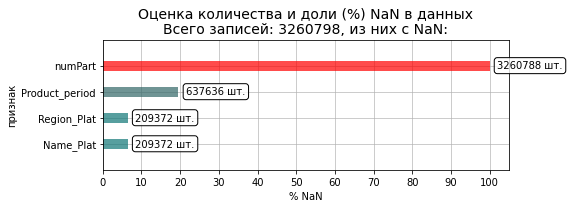

In [107]:
eda_functions.nan_estimation_graph(ext)

In [15]:
ext2 = pd.read_csv(os.path.join(DB2_FOLDER, 'Ext2.csv')).replace({'\\N': np.nan})
ext2

,id_vsd,num_vsd,id_fish,fish,date_vsd,volume,unit
0,7820377,5278887,400,минтай,2022-01-01 00:39:56,75480,NaN
1,9397385,4729853,400,минтай,2022-01-01 01:34:08,62586,NaN
2,8666689,3907934,292,треска,2022-01-01 01:34:11,1155,NaN
3,6371297,5389594,400,минтай,2022-01-01 01:34:05,111048,NaN
4,7953288,5347700,88,окунь-клювач,2022-01-01 01:34:11,1844,NaN
...,...,...,...,...,...,...,...
3115275,9062498,5831811,294,краб-стригун опилио,2022-05-25 12:54:52,774,NaN
3115276,7873072,5667082,294,краб-стригун опилио,2022-05-25 12:57:18,5533,NaN
3115277,7896804,5421544,292,треска,2022-05-25 12:19:02,8235,NaN
3115278,9512980,4007171,408,пикша,2022-05-25 12:19:02,756,NaN


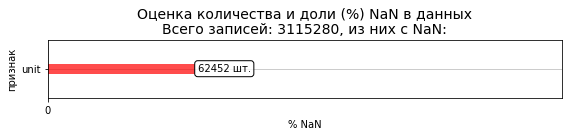

In [108]:
eda_functions.nan_estimation_graph(ext2)

In [105]:
fish2 = ext2[['fish', 'id_fish']]
fish2['fish_from_db1'] = ext2['id_fish'].map(ref_fish_map)
fish2['mapping_fail'] = fish2['fish'] != fish2['fish_from_db1']
fish2 = fish2.drop_duplicates()
display(fish2)
display(fish2[fish2['mapping_fail']])

/var/folders/7q/8vvk22jj58jd3fvwfg98269m0000gn/T/ipykernel_27586/2230388355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish2['fish_from_db1'] = ext2['id_fish'].map(ref_fish_map)
/var/folders/7q/8vvk22jj58jd3fvwfg98269m0000gn/T/ipykernel_27586/2230388355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish2['mapping_fail'] = fish2['fish'] != fish2['fish_from_db1']


,fish,id_fish,fish_from_db1,mapping_fail
0,минтай,400,минтай,False
2,треска,292,треска,False
4,окунь-клювач,88,окунь-клювач,False
6,пикша,408,пикша,False
7,зубатка синяя,610,зубатка синяя,False
...,...,...,...,...
3109837,петух морской,885,петух морской,False
3109840,удильщик (морской черт),91,удильщик (морской черт),False
3110326,макрурус свежий,212,макрурус северный,True
3112801,креветка гренландская,863,креветка гренландская,False


,fish,id_fish,fish_from_db1,mapping_fail
74,зубаны,90,зубан,True
77,сардина,738,сардина (сардинопс),True
1760,терпуг,692,терпуги,True
5314,"кефали (сингиль, лобан)",453,"кефали (сингиль, лобан, остронос)",True
6368,"мольва, мор. щука",401,мольва (морская щука),True
...,...,...,...,...
3084691,щеки трески мороженые,-1,NaN,True
3084702,мойва копченая в масле,-1,NaN,True
3098950,терпуг с перцем,-1,NaN,True
3101653,улитки трубач (Бюло),927,трубачи,True


In [16]:
%autoreload 2
helpers.get_potential_keys(catch, product, top=5, round_to=2)

100%|██████████| 8/8 [00:02<00:00,  3.02it/s]


,key1,key2,n_intersect,n_different,n_min,n_max,n_all,intersection_quality
7,date,date,110,0,110,110,110,1.000000
0,id_ves,id_ves,697,198,733,859,895,0.778771
28,catch_volume,prod_volume,5551,7670,8036,10736,13221,0.419862
29,catch_volume,prod_board_volume,8468,17954,10736,24154,26422,0.320491
32,id_regime,id_prod_designate,2,12,6,10,14,0.142857


In [17]:
merged = catch.merge(product, on=['id_ves', 'date'], how='inner', suffixes=['_catch', '_product'])
prod_by_fish_sum = merged.groupby(['id_ves', 'date', 'id_fish'])['prod_volume'].sum().reset_index()
prod_by_fish_sum.columns = [col if col != 'prod_volume' else 'prod_volume_sum_by_fish' for col in prod_by_fish_sum.columns]
merged = merged.merge(prod_by_fish_sum, on=['id_ves', 'date', 'id_fish'], how='left')
display(merged.sort_values(by=['id_ves', 'date']))

,id_ves,date,id_region,id_fish,catch_volume,id_regime,permit,id_own,id_prod_designate,id_prod_type,prod_volume,prod_board_volume,prod_volume_sum_by_fish
59740,2,2022-01-10,270,848,0.02,1,2161,1051,4,3211,0.00,12.01,0.02
59741,2,2022-01-10,270,848,0.02,1,2161,1051,1,4548,0.02,0.02,0.02
66272,2,2022-01-11,270,848,0.02,1,2161,1051,4,3211,0.00,11.65,0.02
66273,2,2022-01-11,270,848,0.02,1,2161,1051,1,4548,0.02,0.04,0.02
146471,2,2022-01-22,274,849,0.06,1,2327,1252,4,3211,0.00,10.93,2.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
784094,1659,2022-04-11,273,204,4.91,1,2887,1266,1,4555,4.86,4.86,4.86
793776,1659,2022-04-12,273,204,34.02,1,2887,1266,1,4555,33.68,38.54,33.68
803145,1659,2022-04-13,273,204,34.36,1,2887,1266,1,4555,34.02,72.56,34.02
812847,1659,2022-04-14,273,204,54.39,1,2887,1266,1,2211,0.00,11.91,42.06


In [18]:
volume_by_fish = merged[['id_ves', 'date', 'id_fish', 'catch_volume']].drop_duplicates()
volume_by_fish = volume_by_fish.groupby(['id_ves', 'date', 'id_fish'])['catch_volume'].sum().reset_index()
volume_by_all_fish = volume_by_fish.groupby(['id_ves', 'date'])['catch_volume'].sum().reset_index()
volume_by_all_fish

,id_ves,date,catch_volume
0,2,2022-01-10,0.02
1,2,2022-01-11,0.02
2,2,2022-01-22,1.34
3,2,2022-01-23,2.07
4,2,2022-01-24,0.10
...,...,...,...
33357,1659,2022-04-09,106.12
33358,1659,2022-04-11,4.91
33359,1659,2022-04-12,34.02
33360,1659,2022-04-13,34.36


In [19]:
volume_by_prod_type = merged[['id_ves', 'date', 'id_prod_type', 'prod_volume']].drop_duplicates()
volume_by_prod_type = volume_by_prod_type.groupby(['id_ves', 'date', 'id_prod_type'])['prod_volume'].sum().reset_index()
volume_by_all_prod_type = volume_by_prod_type.groupby(['id_ves', 'date'])['prod_volume'].sum().reset_index()
volume_by_all_prod_type

,id_ves,date,prod_volume
0,2,2022-01-10,0.02
1,2,2022-01-11,0.02
2,2,2022-01-22,1.34
3,2,2022-01-23,2.08
4,2,2022-01-24,0.10
...,...,...,...
33357,1659,2022-04-09,37.41
33358,1659,2022-04-11,4.86
33359,1659,2022-04-12,33.68
33360,1659,2022-04-13,34.02


In [20]:
volume_by_ves_and_date = volume_by_all_fish.merge(volume_by_all_prod_type, on=['id_ves', 'date'], how='outer')
display(volume_by_ves_and_date)

,id_ves,date,catch_volume,prod_volume
0,2,2022-01-10,0.02,0.02
1,2,2022-01-11,0.02,0.02
2,2,2022-01-22,1.34,1.34
3,2,2022-01-23,2.07,2.08
4,2,2022-01-24,0.10,0.10
...,...,...,...,...
33357,1659,2022-04-09,106.12,37.41
33358,1659,2022-04-11,4.91,4.86
33359,1659,2022-04-12,34.02,33.68
33360,1659,2022-04-13,34.36,34.02


In [21]:
volume_by_ves = volume_by_ves_and_date[['id_ves', 'catch_volume', 'prod_volume']].groupby('id_ves').agg(sum).reset_index()
volume_by_ves['ves_coef'] = volume_by_ves['prod_volume'] / volume_by_ves['catch_volume']
volume_by_ves['ves_coef'] = volume_by_ves['ves_coef'].round(2)
volume_by_ves

,id_ves,catch_volume,prod_volume,ves_coef
0,2,97.58,97.57,1.00
1,4,4.04,2.45,0.61
2,6,68.88,68.88,1.00
3,8,103.11,72.72,0.71
4,9,59.85,59.85,1.00
...,...,...,...,...
692,1655,1263.83,890.01,0.70
693,1656,15937.06,6754.58,0.42
694,1657,733.67,547.05,0.75
695,1658,10719.22,8858.77,0.83


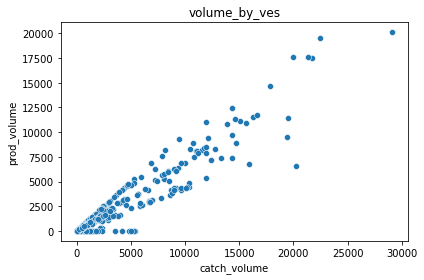

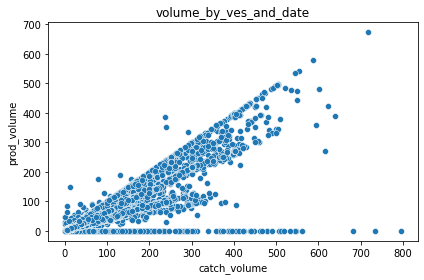

In [22]:
sns.scatterplot(data=volume_by_ves, x='catch_volume', y='prod_volume')
plt.title('volume_by_ves')
plt.tight_layout()
plt.show()

sns.scatterplot(data=volume_by_ves_and_date, x='catch_volume', y='prod_volume')
plt.title('volume_by_ves_and_date')
plt.tight_layout()
plt.show()

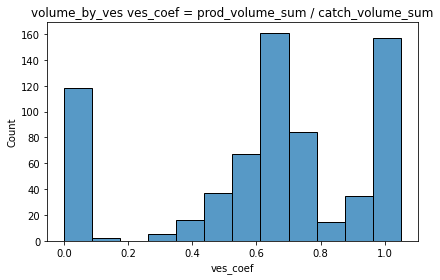

In [27]:
sns.histplot(data=volume_by_ves, x='ves_coef', bins='auto')
plt.title('volume_by_ves ves_coef = prod_volume_sum / catch_volume_sum')
plt.tight_layout()
plt.show()

In [88]:
anomaly_ves = volume_by_ves_and_date.copy()
anomaly_ves = anomaly_ves.merge(volume_by_ves[['id_ves', 'ves_coef']], on='id_ves')
anomaly_ves['local_ves_coef'] = anomaly_ves['prod_volume'] / anomaly_ves['catch_volume']

zero_catch_cond = anomaly_ves['catch_volume'] == 0
zero_prod_cond = anomaly_ves['prod_volume'] == 0

anomaly_ves.loc[zero_catch_cond & zero_prod_cond, 'local_ves_coef'] = 1

anomaly_ves['local_ves_coef'] = anomaly_ves['local_ves_coef'].round(2)
anomaly_ves['ves_coef_ratio'] = (anomaly_ves['local_ves_coef'] - anomaly_ves['ves_coef']) / anomaly_ves['ves_coef']

anomaly_ves['ves_coef_ratio'] = anomaly_ves['ves_coef_ratio'].fillna(0)
anomaly_ves['ves_coef_ratio_cleaned'] = anomaly_ves['ves_coef_ratio']
anomaly_ves.loc[anomaly_ves['ves_coef_ratio_cleaned'] > 1, 'ves_coef_ratio_cleaned'] = np.nan
threshold = 2*anomaly_ves['ves_coef_ratio_cleaned'].std()
print(threshold)
anomaly_ves['abnormal activity'] = np.nan
abnormal_activity_cond = abs(anomaly_ves['ves_coef_ratio']) > threshold
anomaly_ves.loc[abnormal_activity_cond, 'abnormal activity'] = True
# anomaly_ves['abnormal activity'] = anomaly_ves['abnormal activity'].ffill(limit=1)
# anomaly_ves['abnormal activity'] = anomaly_ves['abnormal activity'].bfill(limit=1)
anomaly_ves['abnormal activity'] = anomaly_ves['abnormal activity'].fillna(False)

0.25603085027069544


In [89]:
len(set(anomaly_ves.loc[anomaly_ves['abnormal activity'], 'id_ves'])) / len(set(anomaly_ves['id_ves']))

0.24964131994261118

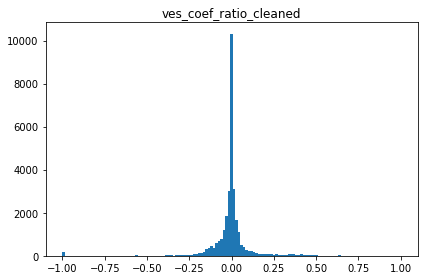

In [51]:
plt.hist(data=anomaly_ves, x='ves_coef_ratio_cleaned', bins='scott')
plt.title('ves_coef_ratio_cleaned')
plt.tight_layout()
plt.show()

In [31]:
%autoreload 2
helpers.get_potential_keys(ext, ext2, top=5, round_to=2)

100%|██████████| 9/9 [01:14<00:00,  8.23s/it]


,key1,key2,n_intersect,n_different,n_min,n_max,n_all,intersection_quality
18,date_fishery,date_vsd,1053653,6733,1054162,1059877,1060386,0.993650
35,id_vsd,id_vsd,3068024,148322,3069426,3214944,3216346,0.953885
27,numPart,unit,1,5,3,4,6,0.166667
9,id_own,id_fish,3,232,79,159,235,0.012766
62,Region_Plat,unit,1,86,3,85,87,0.011494


In [45]:
len(set(ext['id_ves']) & set(catch['id_ves']) ), len(set(ext['id_ves'])), len(set(catch['id_ves']))


(331, 378, 733)

In [52]:
ext2

,id_vsd,num_vsd,id_fish,fish,date_vsd,volume,unit
0,7820377,5278887,400,минтай,2022-01-01 00:39:56,75480,NaN
1,9397385,4729853,400,минтай,2022-01-01 01:34:08,62586,NaN
2,8666689,3907934,292,треска,2022-01-01 01:34:11,1155,NaN
3,6371297,5389594,400,минтай,2022-01-01 01:34:05,111048,NaN
4,7953288,5347700,88,окунь-клювач,2022-01-01 01:34:11,1844,NaN
...,...,...,...,...,...,...,...
3115275,9062498,5831811,294,краб-стригун опилио,2022-05-25 12:54:52,774,NaN
3115276,7873072,5667082,294,краб-стригун опилио,2022-05-25 12:57:18,5533,NaN
3115277,7896804,5421544,292,треска,2022-05-25 12:19:02,8235,NaN
3115278,9512980,4007171,408,пикша,2022-05-25 12:19:02,756,NaN


In [51]:
ext2['id_fish'].map(ref_fish_map)

0                       минтай
1                       минтай
2                       треска
3                       минтай
4                 окунь-клювач
                  ...         
3115275    краб-стригун опилио
3115276    краб-стригун опилио
3115277                 треска
3115278                  пикша
3115279          окунь морской
Name: id_fish, Length: 3115280, dtype: object

In [32]:
merged_ext = ext.merge(ext2, left_on=['id_vsd', 'date_fishery'], right_on=['id_vsd', 'date_vsd'], suffixes=['_ext', '_ext2'], how='inner')

In [46]:
merged_ext['id_fish'].map(ref_fish_map)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
3097275    NaN
3097276    NaN
3097277    NaN
3097278    NaN
3097279    NaN
Name: id_fish, Length: 3097280, dtype: object

In [33]:
merged_ext['id_fish'].map(ref_fish_map)

,id_ves,id_own,date_fishery,numPart,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat,num_vsd,id_fish,fish,date_vsd,volume,unit
0,-1,-1,2022-04-20 02:38:01,NaN,6294403,6834025,9518351,NaN,Камчатский край,5735197,-1,палтус холодного копчения,2022-04-20 02:38:01,110,кг
1,-1,-1,2022-04-20 02:38:01,NaN,6294403,8596508,9518351,NaN,Камчатский край,3596399,-1,палтус холодного копчения,2022-04-20 02:38:01,230,кг
2,-1,-1,2022-04-20 02:37:57,NaN,6295967,9079011,9516052,NaN,Приморский край,4817772,-1,горбуша холодного копчения,2022-04-20 02:37:57,1,кг
3,-1,-1,2022-04-20 02:37:34,NaN,6295967,8489049,9516052,NaN,Приморский край,5416445,-1,скумбрия холодного копчения,2022-04-20 02:37:34,2,кг
4,-1,-1,2022-04-20 02:37:04,NaN,6295967,8183544,9516052,NaN,Приморский край,5939612,-1,сардина холодного копчения,2022-04-20 02:37:04,1,кг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097275,-1,-1,2022-01-02 00:02:35,NaN,6294690,7601012,9515018,2022-01-02 00:00:00,г. Москва,5547213,-1,пресервы рыбные,2022-01-02 00:02:35,604,кг
3097276,-1,-1,2022-01-02 00:02:35,NaN,6294690,8450974,9515018,2022-01-02 00:00:00,г. Москва,4684371,-1,пресервы рыбные,2022-01-02 00:02:35,295,кг
3097277,-1,-1,2022-01-02 00:02:35,NaN,6294690,6391908,9515018,2022-01-02 00:00:00,г. Москва,4275966,-1,крабовые палочки,2022-01-02 00:02:35,13887,кг
3097278,-1,-1,2022-01-02 00:02:19,NaN,6294190,7006117,9513603,2022-01-02 00:00:00,Республика Хакасия,3538080,-1,"филе минтая в тесте, панировке",2022-01-02 00:02:19,1,кг


In [1]:
catch

NameError: name 'catch' is not defined

In [34]:
%autoreload 2
helpers.get_potential_keys(catch, ext, top=5, round_to=2)

100%|██████████| 8/8 [00:34<00:00,  4.37s/it]


,key1,key2,n_intersect,n_different,n_min,n_max,n_all,intersection_quality
0,id_ves,id_ves,331,449,378,733,780,0.424359
64,id_own,id_own,121,267,159,350,388,0.311856
28,id_fish,id_own,3,271,118,159,274,0.010949
63,id_own,id_ves,1,726,350,378,727,0.001376
1,id_ves,id_own,1,890,159,733,891,0.001122


In [35]:
equal_id_own = set(catch['id_own']) & set(ext['id_own'])

In [36]:
merged[merged['id_own'].isin(equal_id_own)]

,id_ves,date,id_region,id_fish,catch_volume,id_regime,permit,id_own,id_prod_designate,id_prod_type,prod_volume,prod_board_volume,prod_volume_sum_by_fish
0,1628,2022-01-01,272,400,31.87,41,2824,961,1,3964,0.16,4.49,20.55
1,1628,2022-01-01,272,400,31.87,41,2824,961,1,3524,18.17,352.45,20.55
2,1628,2022-01-01,272,400,31.87,41,2824,961,1,2606,1.78,29.44,20.55
3,1628,2022-01-01,272,400,31.87,41,2824,961,1,2472,0.44,9.80,20.55
12,1608,2022-01-01,116,409,26.31,15,3031,1227,1,10039,0.00,8.61,26.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883748,1377,2022-04-20,108,721,0.06,97,1976,995,1,9016,0.44,1.17,12.99
883749,1377,2022-04-20,108,721,0.06,97,1976,995,1,9017,0.59,1.99,12.99
883750,1377,2022-04-20,108,721,0.06,97,1976,995,1,9234,0.14,0.56,12.99
883751,1377,2022-04-20,108,721,0.06,97,1976,995,1,9269,0.00,0.01,12.99


In [37]:
merged_ext.sort_values(by='date_fishery')

,id_ves,id_own,date_fishery,numPart,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat,num_vsd,id_fish,fish,date_vsd,volume,unit
3097279,-1,-1,2022-01-02 00:02:11,NaN,6296544,7490226,9515739,2022-01-01 00:00:00 - 2022-01-01 23:00:00,г. Москва,5803499,-1,полуфабрикаты рыбные,2022-01-02 00:02:11,7,кг
3097278,-1,-1,2022-01-02 00:02:19,NaN,6294190,7006117,9513603,2022-01-02 00:00:00,Республика Хакасия,3538080,-1,"филе минтая в тесте, панировке",2022-01-02 00:02:19,1,кг
3097276,-1,-1,2022-01-02 00:02:35,NaN,6294690,8450974,9515018,2022-01-02 00:00:00,г. Москва,4684371,-1,пресервы рыбные,2022-01-02 00:02:35,295,кг
3097274,-1,-1,2022-01-02 00:02:35,NaN,6294690,7241574,9515018,2022-01-02 00:00:00,г. Москва,4370277,-1,пресервы рыбные,2022-01-02 00:02:35,1211,кг
3097277,-1,-1,2022-01-02 00:02:35,NaN,6294690,6391908,9515018,2022-01-02 00:00:00,г. Москва,4275966,-1,крабовые палочки,2022-01-02 00:02:35,13887,кг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,-1,-1,2022-04-20 02:37:04,NaN,6295967,8183544,9516052,NaN,Приморский край,5939612,-1,сардина холодного копчения,2022-04-20 02:37:04,1,кг
3,-1,-1,2022-04-20 02:37:34,NaN,6295967,8489049,9516052,NaN,Приморский край,5416445,-1,скумбрия холодного копчения,2022-04-20 02:37:34,2,кг
2,-1,-1,2022-04-20 02:37:57,NaN,6295967,9079011,9516052,NaN,Приморский край,4817772,-1,горбуша холодного копчения,2022-04-20 02:37:57,1,кг
1,-1,-1,2022-04-20 02:38:01,NaN,6294403,8596508,9518351,NaN,Камчатский край,3596399,-1,палтус холодного копчения,2022-04-20 02:38:01,230,кг


In [38]:
merged_ext[merged_ext['id_own'].isin(equal_id_own)]

,id_ves,id_own,date_fishery,numPart,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat,num_vsd,id_fish,fish,date_vsd,volume,unit


In [39]:
%autoreload 2
helpers.get_potential_keys(catch, ext2, top=5, round_to=2)

100%|██████████| 8/8 [00:37<00:00,  4.73s/it]


,key1,key2,n_intersect,n_different,n_min,n_max,n_all,intersection_quality
23,id_fish,id_fish,69,59,79,118,128,0.539062
47,permit,volume,1408,35722,1408,37130,37130,0.037921
2,id_ves,id_fish,29,754,79,733,783,0.037037
5,id_ves,volume,733,36397,733,37130,37130,0.019741
16,id_region,id_fish,2,125,50,79,127,0.015748
